# Rhabdomere lengths of long photoreceptor subtypes
- R7 and R8 are stacked on top of each other
- R7' is present almost entire rhabdom length

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os.path

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.lines import Line2D

import sys
from cx_analysis.dataframe_tools import assemble_rhabdomere_df
from cx_analysis.vis.fig_tools import subtype_cm
from cx_analysis.vis.hex_lattice import hexplot, om_to_hex
from mpl_toolkits.mplot3d import Axes3D

cm = subtype_cm()

plt.rcdefaults()
plt.style.use('../cx_analysis/vis/lamina.mplstyle') # may not work if installed as a module

In [2]:
### SAVE FIGS? ###
save_figs = True
fig_path = os.path.expanduser(f'~/Dropbox (Simons Foundation)/lamina_figures/')
##################
# if save_figs:
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/FNAME.svg')
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/FNAME.png')

In [3]:
tp = '210809'
xl_dir = f'~/Data/{tp}_lamina/Raw microvilli.xlsx'
full_df = pd.read_excel(xl_dir, sheet_name='microvilli angle', header=None, index_col=None)

rhab = assemble_rhabdomere_df(full_df)


In [4]:
# A dataframe indexed containing fields for each rhabdomere's distal and proximal
# extents (z-index), length (microns), corresponding rhabdom's length
df = pd.DataFrame(index=pd.MultiIndex.from_product([np.unique(rhab['om']), np.unique(rhab['subtype'])], 
                                                        names=['om', 'subtype']), 
                  columns=['dist_z', 'prox_z', 'dist_microns', 'prox_microns', 'len', 'rhabdom_len'])

for om, om_rows in rhab.groupby('om'):
    dist_rhabdom_z = om_rows['z-index'].min()
    prox_rhabdom_z = om_rows['z-index'].max()
    rhabdom_zlen = abs(dist_rhabdom_z - prox_rhabdom_z)
    
    for st, rows in om_rows.groupby('subtype'):
        pr = (om, st)
        # the most distal z of each rhabdom becomes the 0 point
        df.loc[pr]['dist_z'] = abs(rows['z-index'].min() - dist_rhabdom_z) 
        df.loc[pr]['prox_z'] = abs(rows['z-index'].max() - dist_rhabdom_z)
        
        df.loc[pr]['dist_microns'] = df.loc[pr]['dist_z'] * 0.008
        df.loc[pr]['prox_microns'] = df.loc[pr]['prox_z'] * 0.008
        # the following are converted to microns
        df.loc[pr]['len'] = abs(df.loc[pr]['dist_z'] - df.loc[pr]['prox_z']) * 0.008
        df.loc[pr]['rhabdom_len'] = rhabdom_zlen * 0.008
        
df.reset_index(inplace=True)

In [5]:
df.head(30)

,om,subtype,dist_z,prox_z,dist_microns,prox_microns,len,rhabdom_len
0,A0,R1,88.0,1465.0,0.704,11.72,11.016,18.248
1,A0,R2,148.0,2065.0,1.184,16.52,15.336,18.248
2,A0,R3,95.0,1904.0,0.76,15.232,14.472,18.248
3,A0,R4,77.0,1796.0,0.616,14.368,13.752,18.248
4,A0,R5,89.0,2186.0,0.712,17.488,16.776,18.248
5,A0,R6,45.0,1521.0,0.36,12.168,11.808,18.248
6,A0,R7,5.0,1490.0,0.04,11.92,11.88,18.248
7,A0,R7',0.0,2178.0,0.0,17.424,17.424,18.248
8,A0,R8,859.0,2281.0,6.872,18.248,11.376,18.248
9,A1,R1,47.0,1190.0,0.376,9.52,9.144,15.992


om
A0    18.248
A1    15.992
A2    14.496
A3    12.968
A4    12.096
A5    13.304
B0    17.064
B1    17.392
B2    15.184
B3     14.88
B4    13.224
B5    13.368
B6    14.192
C1    15.584
C2     15.68
C3    14.592
C4    13.312
C5    12.888
C6    14.136
D2     13.76
D3     14.64
D4    13.792
D5     13.52
D6    13.976
D7    14.032
E4    12.704
E5    11.088
E6    13.352
E7     13.96
Name: rhabdom_len, dtype: object

'Mean:  14.26'

'SD:  1.54'

<AxesSubplot:title={'center':'Rhabdom length ($\\mu$m)'}>

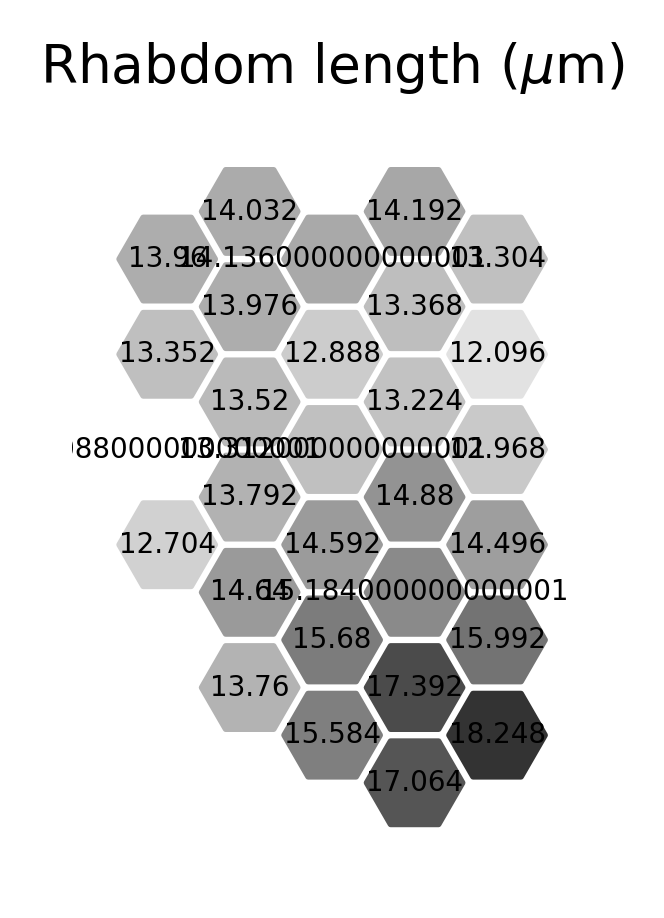

In [6]:
data = df.loc[df['subtype'] == 'R1', ('om', 'rhabdom_len')].set_index('om')
data = data['rhabdom_len']
display(data)
#data.to_pickle("~/Dropbox/Data/201123_rh_len_df.pickle")
display(f"Mean: {data.mean(): .2f}")
display(f"SD: {data.std(ddof=0): .2f}")
fig, ax = plt.subplots(1)
ax.set_title('Rhabdom length ($\mu$m)')
fig.tight_layout(pad=0)
hexplot(pd.Series(data), ax=ax)


In [7]:
# if save_figs:
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/rhabdomlenhex.svg')
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/rhabdomlenhex.png')

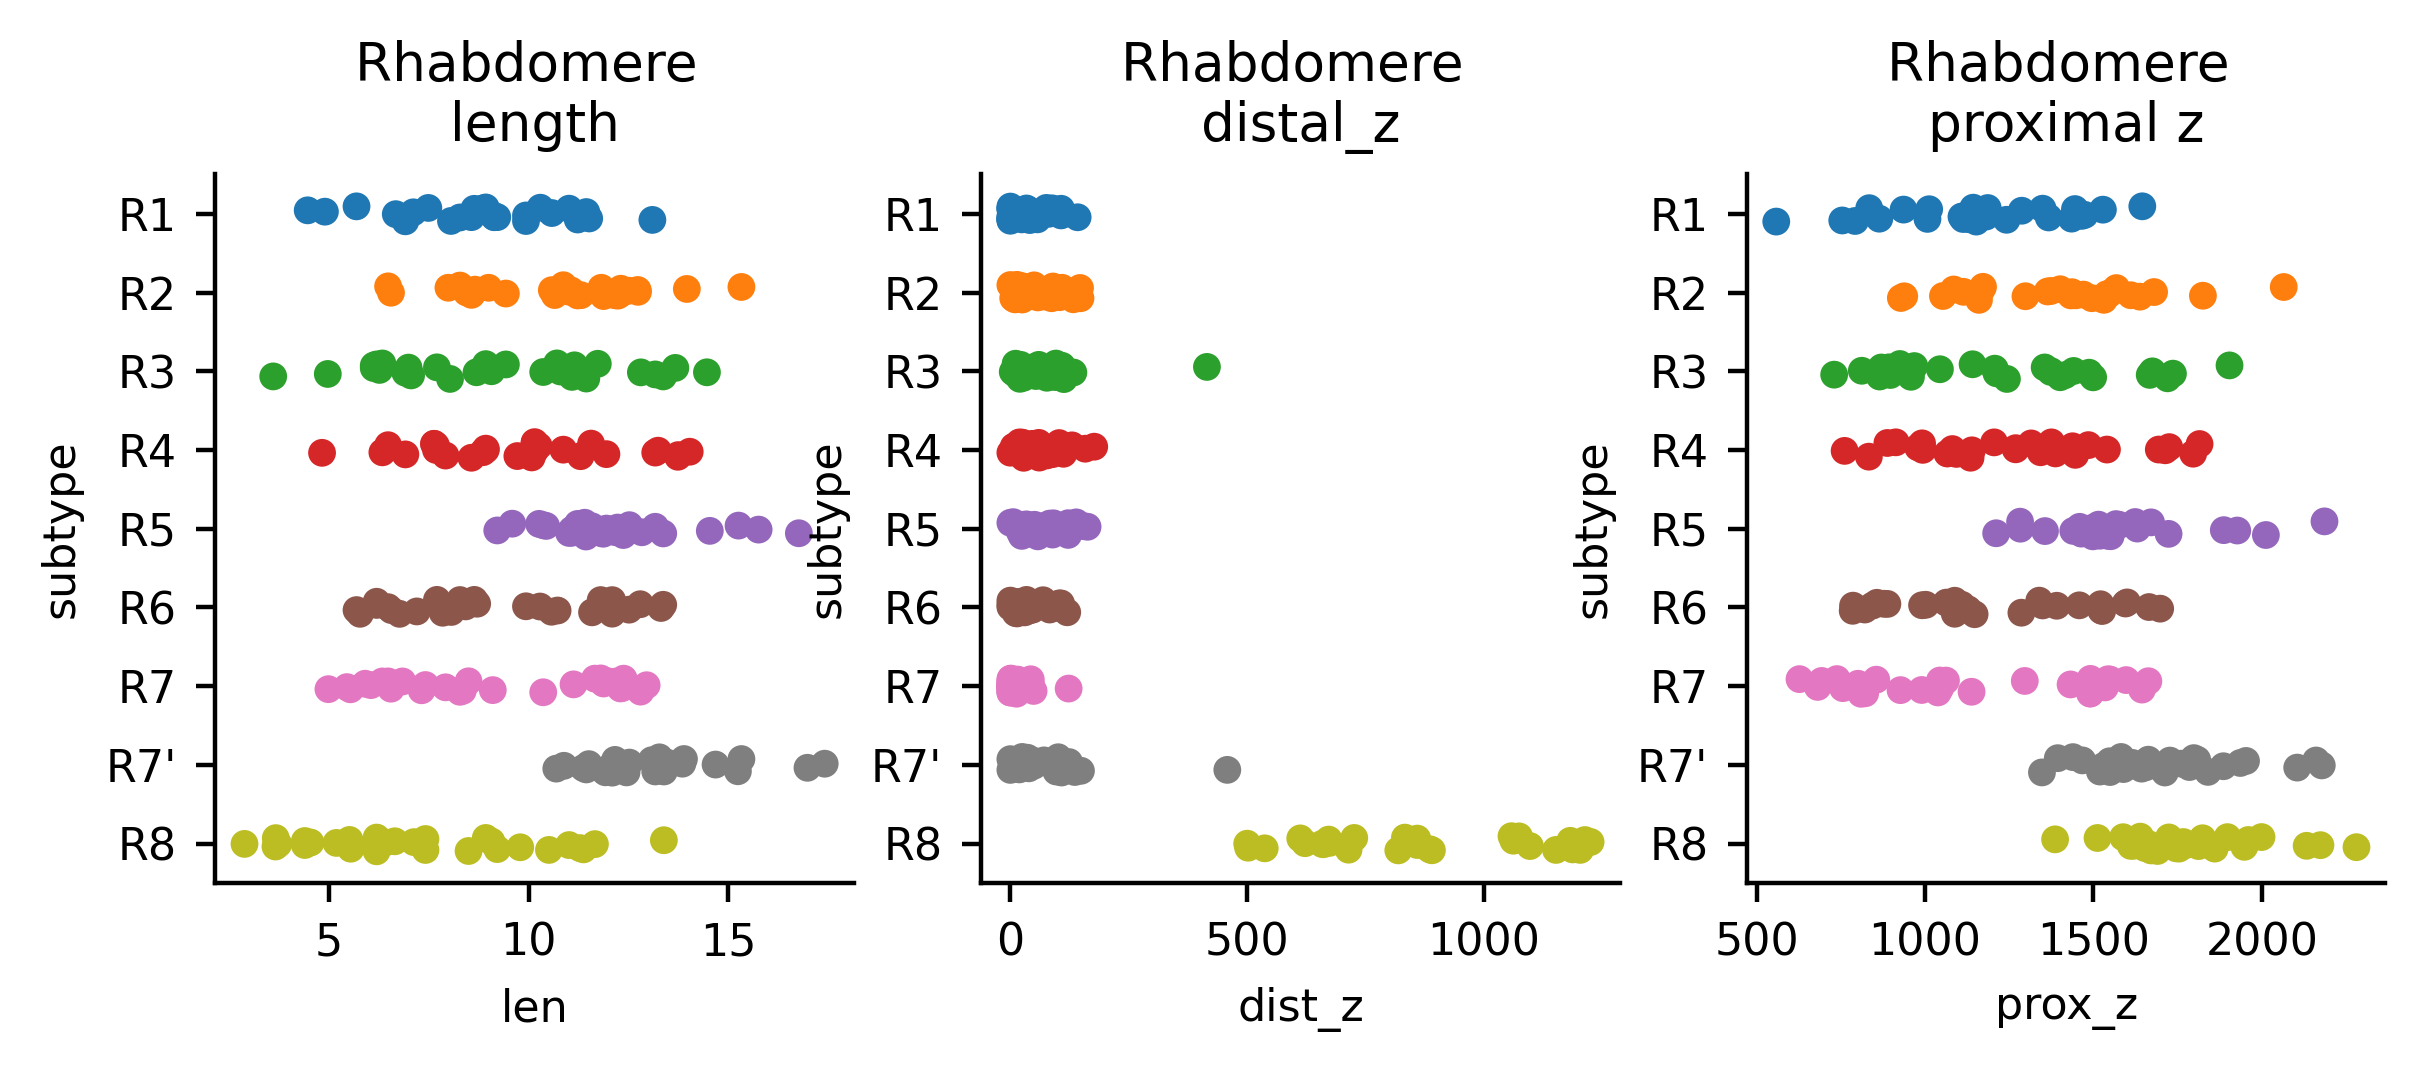

In [8]:
fig, ax = plt.subplots(1, 3, figsize=[7, 2.3])

sns.stripplot(x='len', y='subtype', data=df, ax=ax[0])
sns.stripplot(x='dist_z', y='subtype', data=df, ax=ax[1])
sns.stripplot(x='prox_z', y='subtype', data=df, ax=ax[2])

ax[0].set_title('Rhabdomere \nlength')
ax[1].set_title('Rhabdomere \ndistal_z')
ax[2].set_title('Rhabdomere \nproximal z')

plt.show()

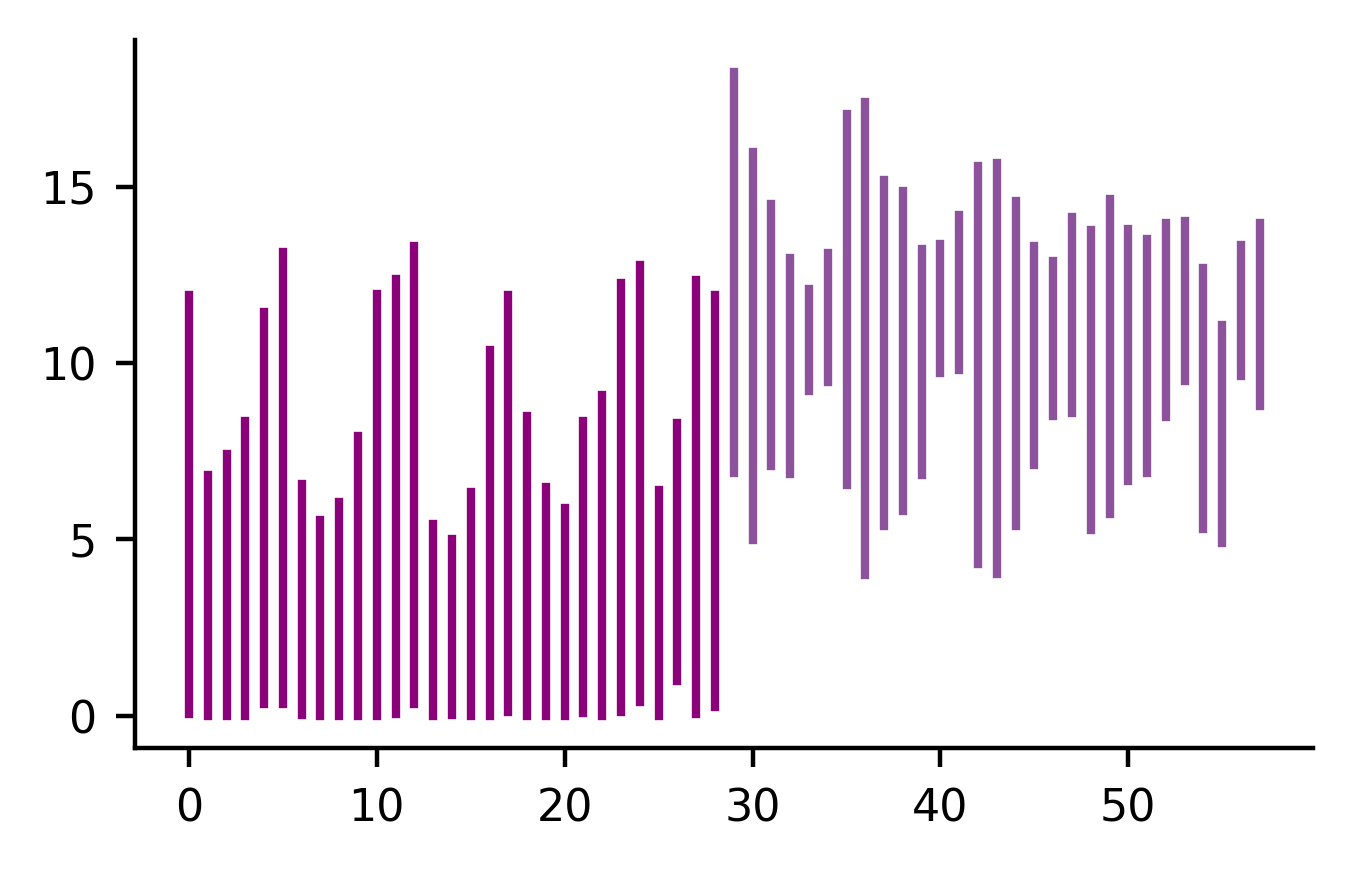

In [9]:
fig, ax = plt.subplots()
y = 0
for st, rows in df.groupby('subtype'):
    if st not in ['R7', 'R8', "R7p"]:
        continue
    else:
        for ind, r in rows.sort_values(by='om').iterrows():
    
            ax.plot([y, y], [r['dist_microns'], r['prox_microns']], c=cm[st])
            y +=1

In [10]:
lvf_rows = [i for i, r in df.iterrows() if (int(r['subtype'][1]) > 6)]
lvf_df = df.loc[lvf_rows]
#display(lvf_df)

In [11]:
# # Explore different viewing angles (AZIMUTH) for 3D plot

# fig = plt.figure(figsize=[20, 40])

# bar_width = 0.1

# sts = ['R7', 'R8']
# cs = ['fuchsia', 'blueviolet']
# shift = 0
# for i, angle in enumerate(range(0, 360, 10)):
    
#     ax = fig.add_subplot(18, 2, i + 1, projection='3d')

#     ax.view_init(45, angle) # (elav, azim)
    
#     for st, c in zip(sts, cs):
#         X = []
#         Y = []
#         Z = []
#         DZ = []

#         for om, rows in lvf_df.groupby('om'):
#             x, y = om_to_hex(om)
#             z = rows.loc[rows['subtype'] == st, 'prox_z'].values[0]
#             dz = z - rows.loc[rows['subtype'] == st, 'dist_z'].values[0]

#             X.append(x)
#             Y.append(y + shift)
#             Z.append(z)
#             DZ.append(dz)
#         shift += bar_width * 2
#         ax.bar3d(X, Y, Z, bar_width, bar_width, DZ, color=c)
#         ax.set_xlabel('Anterior -> Posterior')
#         ax.set_ylabel('Ventral -> Dorsal')
#         ax.set_title(f'azimuth = {angle}')
#         #ax.legend()
    




In [12]:
# # Explore different viewing angles (ELEVATION) for 3D plot

# fig = plt.figure(figsize=[20, 40])

# bar_width = 0.1

# sts = ['R7', 'R8']
# cs = ['fuchsia', 'blueviolet']
# shift = 0
# for i, angle in enumerate(range(0, 90, 5)):
    
#     ax = fig.add_subplot(18, 2, i + 1, projection='3d')

#     ax.view_init(angle, 160) # (elav, azim)
    
#     for st, c in zip(sts, cs):
#         X = []
#         Y = []
#         Z = []
#         DZ = []

#         for om, rows in lvf_df.groupby('om'):
#             x, y = om_to_hex(om)
#             z = rows.loc[rows['subtype'] == st, 'prox_z'].values[0]
#             dz = z - rows.loc[rows['subtype'] == st, 'dist_z'].values[0]

#             X.append(x)
#             Y.append(y + shift)
#             Z.append(z)
#             DZ.append(dz)
#         shift += bar_width * 2
#         ax.bar3d(X, Y, Z, bar_width, bar_width, DZ, color=c)
#         ax.set_xlabel('Anterior -> Posterior')
#         ax.set_ylabel('Ventral -> Dorsal')
#         ax.set_title(f'elavation = {angle}')
#         #ax.legend()
    




In [13]:
# fig = plt.figure(figsize=[3.8, 4.6])
# ax = fig.add_subplot(111, projection='3d')
# azim = 100
# elev = 25

# ax.view_init(elev, azim)

# w = 2

# sts = ['R8', 'R7']
# cs = ['blueviolet', 'fuchsia']
# shift = 0
# for st, c in zip(sts, cs):
    
#     for om, rows in lvf_df.groupby('om'):
#         x, y = om_to_hex(om)
        
#         # TODO: adjust coords from om_to_hex
#         x = x - 4.0
#         y = (y + 33) * 4
        
#         proxz = rows.loc[rows['subtype'] == st, 'prox_z'].values[0] * 0.008
#         distz = rows.loc[rows['subtype'] == st, 'dist_z'].values[0] * 0.008 # microns

#         ax.plot([x, x], [y, y], [proxz, distz], color=c, linewidth=w, alpha=0.3, zorder=0)
#         ax.scatter([x, x], [y, y], [distz, proxz], s=(w + 1)**2, color=c, facecolor='w', alpha=1.0)
        
#         if st == 'R7':
#             ax.text(x - 0.05, y, 0, str(om), zdir='x', fontsize=8)

        
# ax.set_xticks(np.arange(0.0, 4.0,  np.sqrt(3.0)/2.0))
# ax.set_xlim([0, 4.0])
# ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])
# ax.set_xlabel('Ommatidium position (Pos. -> Ant.)')

# ax.set_yticks([])
# ax.set_ylabel('Ommatidium position (Dor. -> Ven.)')

# ax.set_zticks(np.arange(0, 20, 5))
# ax.set_zlabel('Rhabdomere depth from distal rhabdom (\u03BCm)')


# print(Z)


In [14]:
#fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/r7r8-3d-flipped.svg', dpi=1000)

In [15]:
# fig = plt.figure(figsize=[20, 15])
# ax = fig.add_subplot(111, projection='3d')
# azim = 105
# elev = 25

# ax.view_init(elev, azim)
# ax.invert_zaxis()

# w = 8

# sts = ['R8', 'R7']
# cs = ['blueviolet', 'fuchsia']
# shift = 0
# for st, c in zip(sts, cs):
# #     X = []
# #     Y = []
# #     Z = []
# #     DZ = []
    
#     for om, rows in lvf_df.groupby('om'):
#         x, y = om_to_hex(om)
        
#         # TODO: adjust coords from om_to_hex
#         x = x - 4.0
#         y = (y + 33) * 6
        
#         proxz = rows.loc[rows['subtype'] == st, 'prox_z'].values[0] * 0.008
#         distz = rows.loc[rows['subtype'] == st, 'dist_z'].values[0] * 0.008 # microns

#         ax.plot([x, x], [y, y], [proxz, distz], color=c, linewidth=w, alpha=0.3, zorder=0)
#         ax.scatter([x, x], [y, y], [distz, proxz], s=(w + 2)**2, color=c, facecolor='w', alpha=1.0)
        
#         if st == 'R7':
#             ax.text(x - 0.05, y, 0, str(om), zdir='x', fontsize=12)
        
# ax.set_xticks(np.arange(0.0, 4.0,  np.sqrt(3.0)/2.0))
# ax.set_xlim([0, 4.0])
# ax.set_xticklabels(['A', 'B', 'C', 'D', 'E'])
# ax.set_xlabel('Ommatidium position (Pos. -> Ant.)')

# ax.set_yticks([])
# ax.set_ylabel('Ommatidium position (Dor. -> Ven.)')

# ax.set_zticks(np.arange(0, 20, 5))
# ax.set_zlabel('Rhabdomere depth from distal rhabdom (\u03BCm)')


# #print(Z)

,om,subtype,dist_z,prox_z,dist_microns,prox_microns,len,rhabdom_len
6,A0,R7,5.0,1490.0,0.04,11.92,11.88,18.248
7,A0,R7',0.0,2178.0,0.0,17.424,17.424,18.248
8,A0,R8,859.0,2281.0,6.872,18.248,11.376,18.248
15,A1,R7,0.0,855.0,0.0,6.84,6.84,15.992
16,A1,R7',47.0,1953.0,0.376,15.624,15.248,15.992
...,...,...,...,...,...,...,...,...
250,E6,R7',25.0,1582.0,0.2,12.656,12.456,13.352
251,E6,R8,1203.0,1669.0,9.624,13.352,3.728,13.352
258,E7,R7,33.0,1491.0,0.264,11.928,11.664,13.96
259,E7,R7',97.0,1519.0,0.776,12.152,11.376,13.96


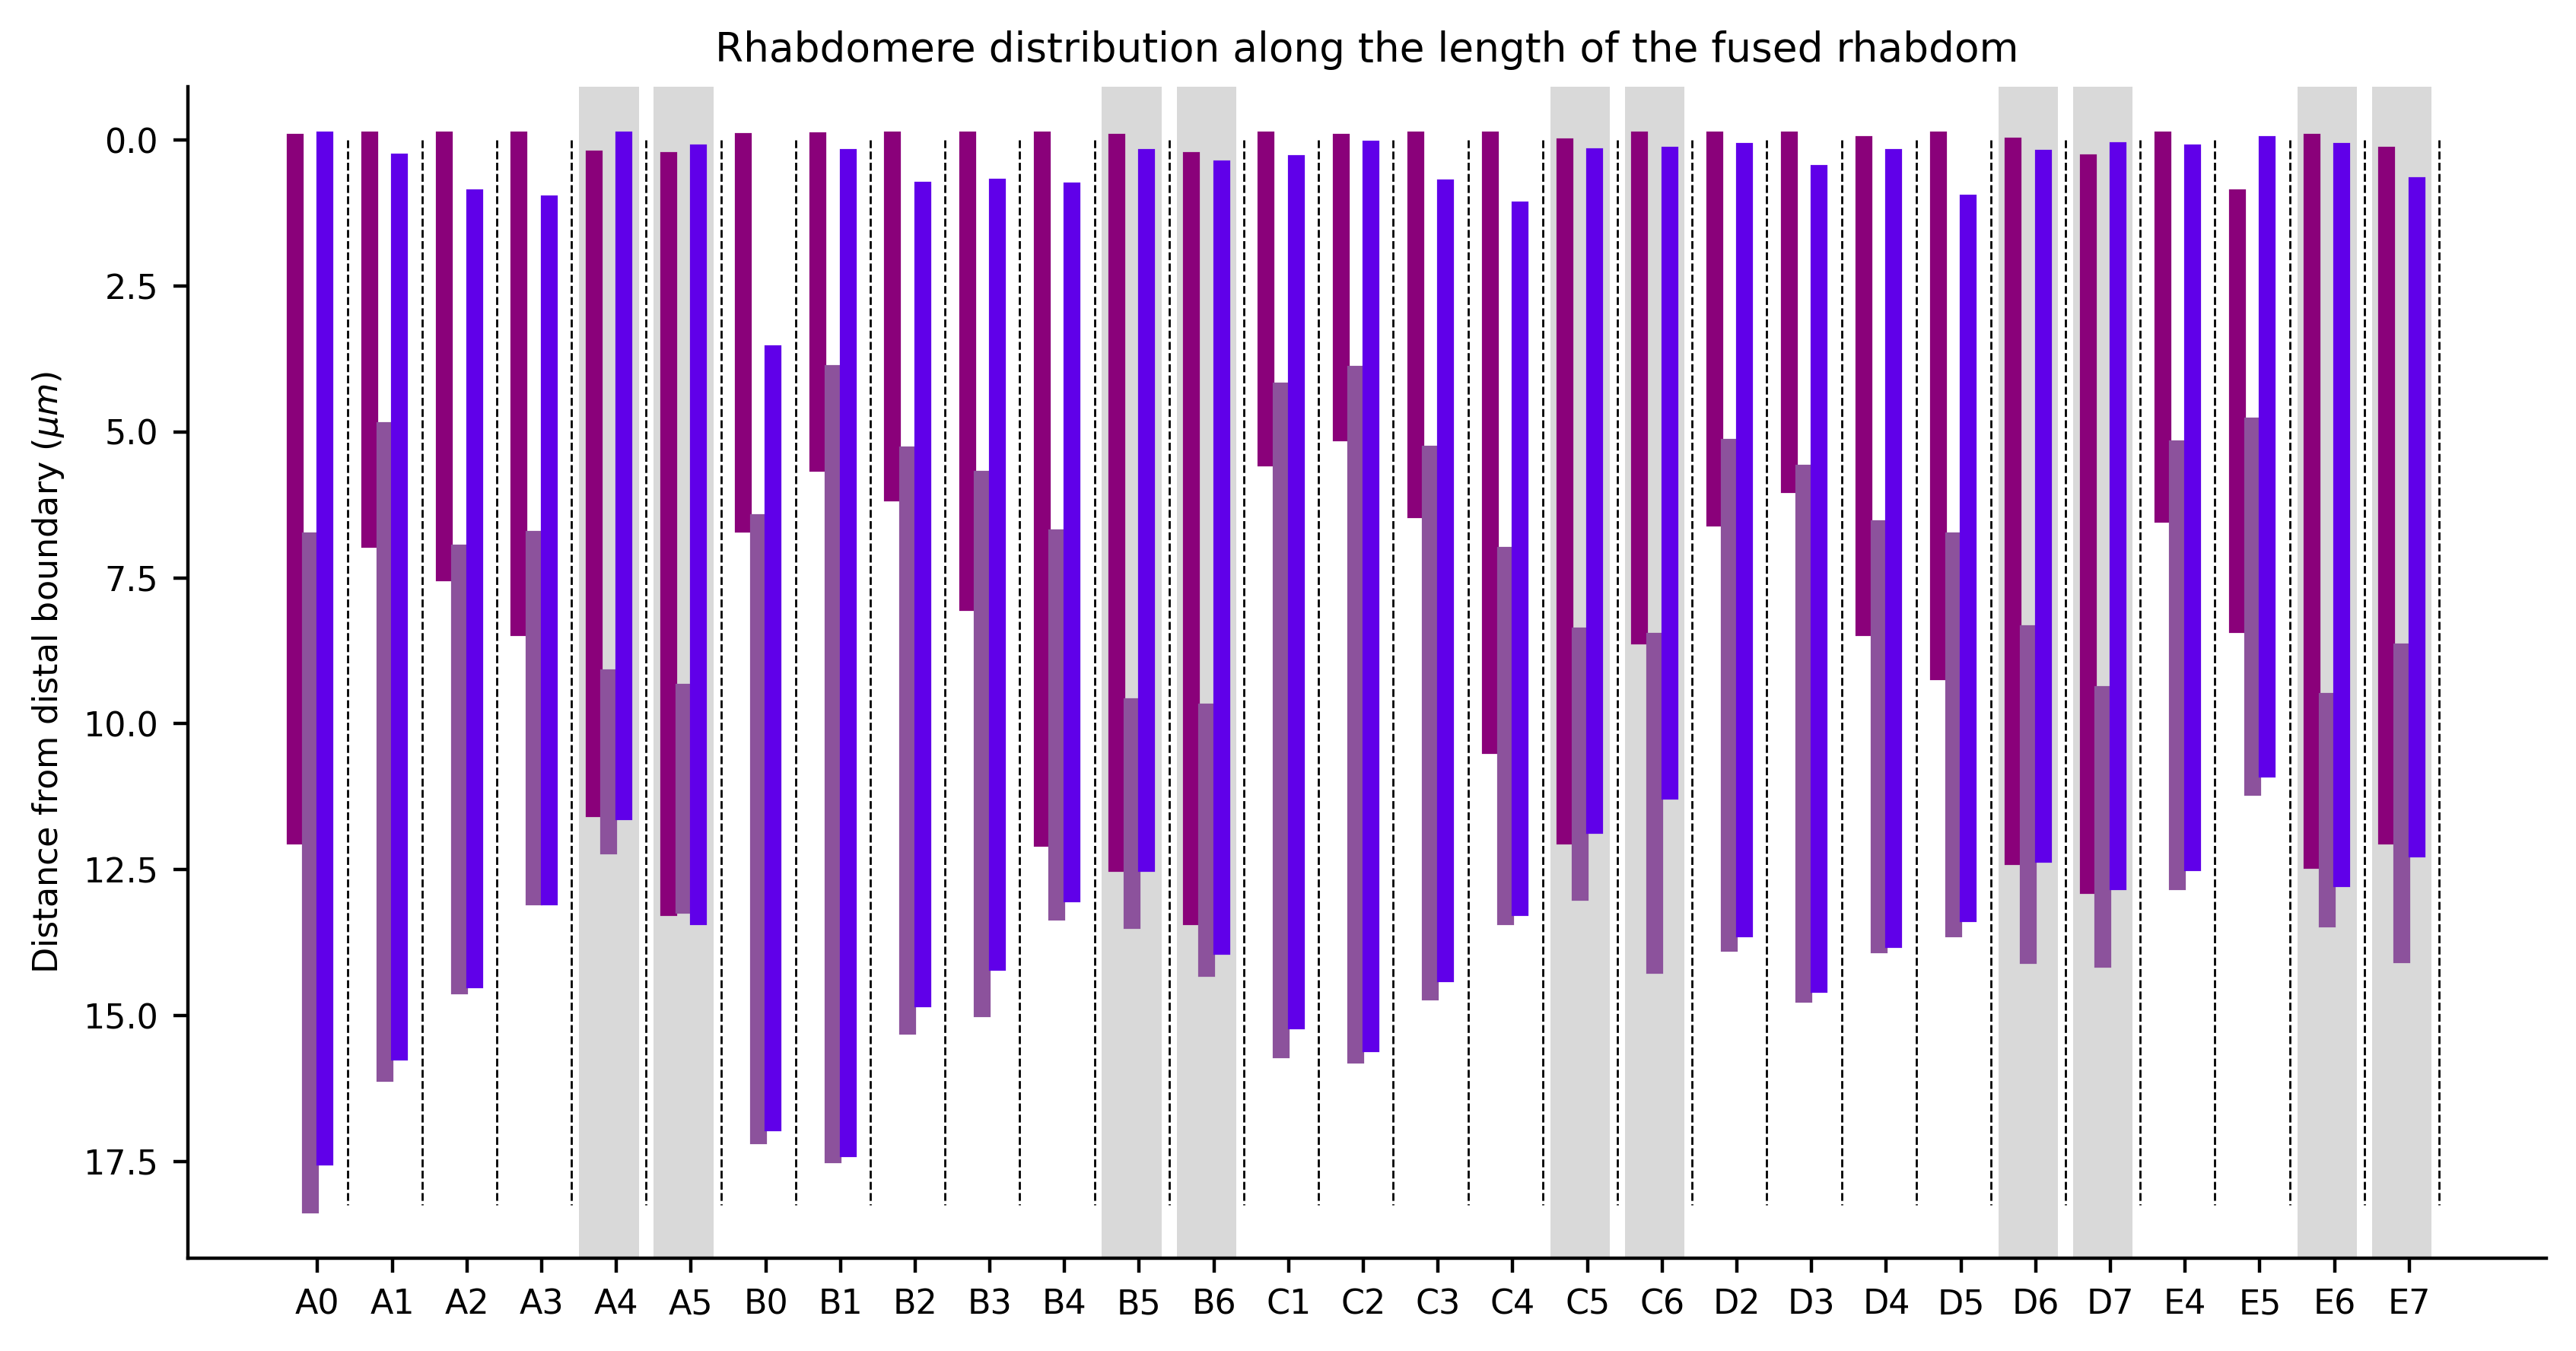

In [16]:
fig, ax = plt.subplots(figsize=[10, 5])
lvf_rows = [i for i, r in df.iterrows() if (int(r['subtype'][1]) > 6)]
lvf_df = df.loc[lvf_rows]

ylim = lvf_df['prox_microns'].max()
order = {'R7': 0, 'R8': 1, "R7'": 2}

pr_spacing = 5.0
om_spacing = 10.0
xtick_pos = []
xtick_labels = []

x = 0
i = 0

display(lvf_df)
for om, rows in lvf_df.groupby('om'):
# for om in ['B6', 'E7', 'D7', 'C6', 'A5', 'D6', 'B5', 'E6', 'C5', 'A4', 'E5', 'D5',
#        'D4', 'E4', 'C4', 'A3', 'B4', 'D2', 'D3', 'A0', 'B3', 'C3', 'C1', 'A2',
#        'A1', 'B0', 'B2', 'C2', 'B1']:
    rows = lvf_df.loc[lvf_df['om'] == om]
    for ind, r in rows.iloc[rows['subtype'].map(order)].iterrows():

        y1 = r['dist_microns']
        y2 = r['prox_microns']
        
        if om in ['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E6', 'E7'] and ind % 3 == 0: 
            # add grey bar to DRA ommatidia
            #['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7']:
            ax.axvspan(x - om_spacing, x + (4*pr_spacing + om_spacing), facecolor='0.85')
        
        ax.plot([x, x], [y1, y2], c=cm[r['subtype']], linewidth=4.0)
        i += 1
        x += pr_spacing

        if (i % 3 == 0) and (i > 0):
            xtick_pos.append(x - 2*pr_spacing)
            xtick_labels.append(om)
            x += om_spacing
            if i in [6*3, 13*3, 19*3, 25*3, 29*3]:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=0.5)
                #ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=1.5)
            else:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=0.5)
            x += om_spacing
        x += pr_spacing

ax.set_title('Rhabdomere distribution along the length of the fused rhabdom')
ax.set_xticks(xtick_pos)
ax.set_xticklabels(xtick_labels)
ax.set_ylabel('Distance from distal boundary ($\mu m$)')
ax.invert_yaxis()

if save_figs:
    fig.savefig(fig_path + 'PR_lvf_rh_length.svg')
    fig.savefig(fig_path + 'PR_lvf_rh_length.png')


,om,subtype,dist_z,prox_z,dist_microns,prox_microns,len,rhabdom_len
6,A0,R7,5.0,1490.0,0.04,11.92,11.88,18.248
7,A0,R7',0.0,2178.0,0.0,17.424,17.424,18.248
8,A0,R8,859.0,2281.0,6.872,18.248,11.376,18.248
15,A1,R7,0.0,855.0,0.0,6.84,6.84,15.992
16,A1,R7',47.0,1953.0,0.376,15.624,15.248,15.992
...,...,...,...,...,...,...,...,...
250,E6,R7',25.0,1582.0,0.2,12.656,12.456,13.352
251,E6,R8,1203.0,1669.0,9.624,13.352,3.728,13.352
258,E7,R7,33.0,1491.0,0.264,11.928,11.664,13.96
259,E7,R7',97.0,1519.0,0.776,12.152,11.376,13.96


     om subtype  dist_z  prox_z dist_microns prox_microns    len rhabdom_len
114  B6      R7    43.0  1663.0        0.344       13.304  12.96      14.192
115  B6     R7'    62.0  1727.0        0.496       13.816  13.32      14.192
116  B6      R8  1225.0  1774.0          9.8       14.192  4.392      14.192
     om subtype  dist_z  prox_z dist_microns prox_microns     len rhabdom_len
258  E7      R7    33.0  1491.0        0.264       11.928  11.664       13.96
259  E7     R7'    97.0  1519.0        0.776       12.152  11.376       13.96
260  E7      R8  1097.0  1745.0        8.776        13.96   5.184       13.96
     om subtype  dist_z  prox_z dist_microns prox_microns     len rhabdom_len
222  D7      R7    49.0  1597.0        0.392       12.776  12.384      14.032
223  D7     R7'    23.0  1589.0        0.184       12.712  12.528      14.032
224  D7      R8  1187.0  1754.0        9.496       14.032   4.536      14.032
     om subtype  dist_z  prox_z dist_microns prox_microns     len rh

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/home/nchua/Dropbox/lamina_figures/210709/PR_lvf_rh_length.svg'

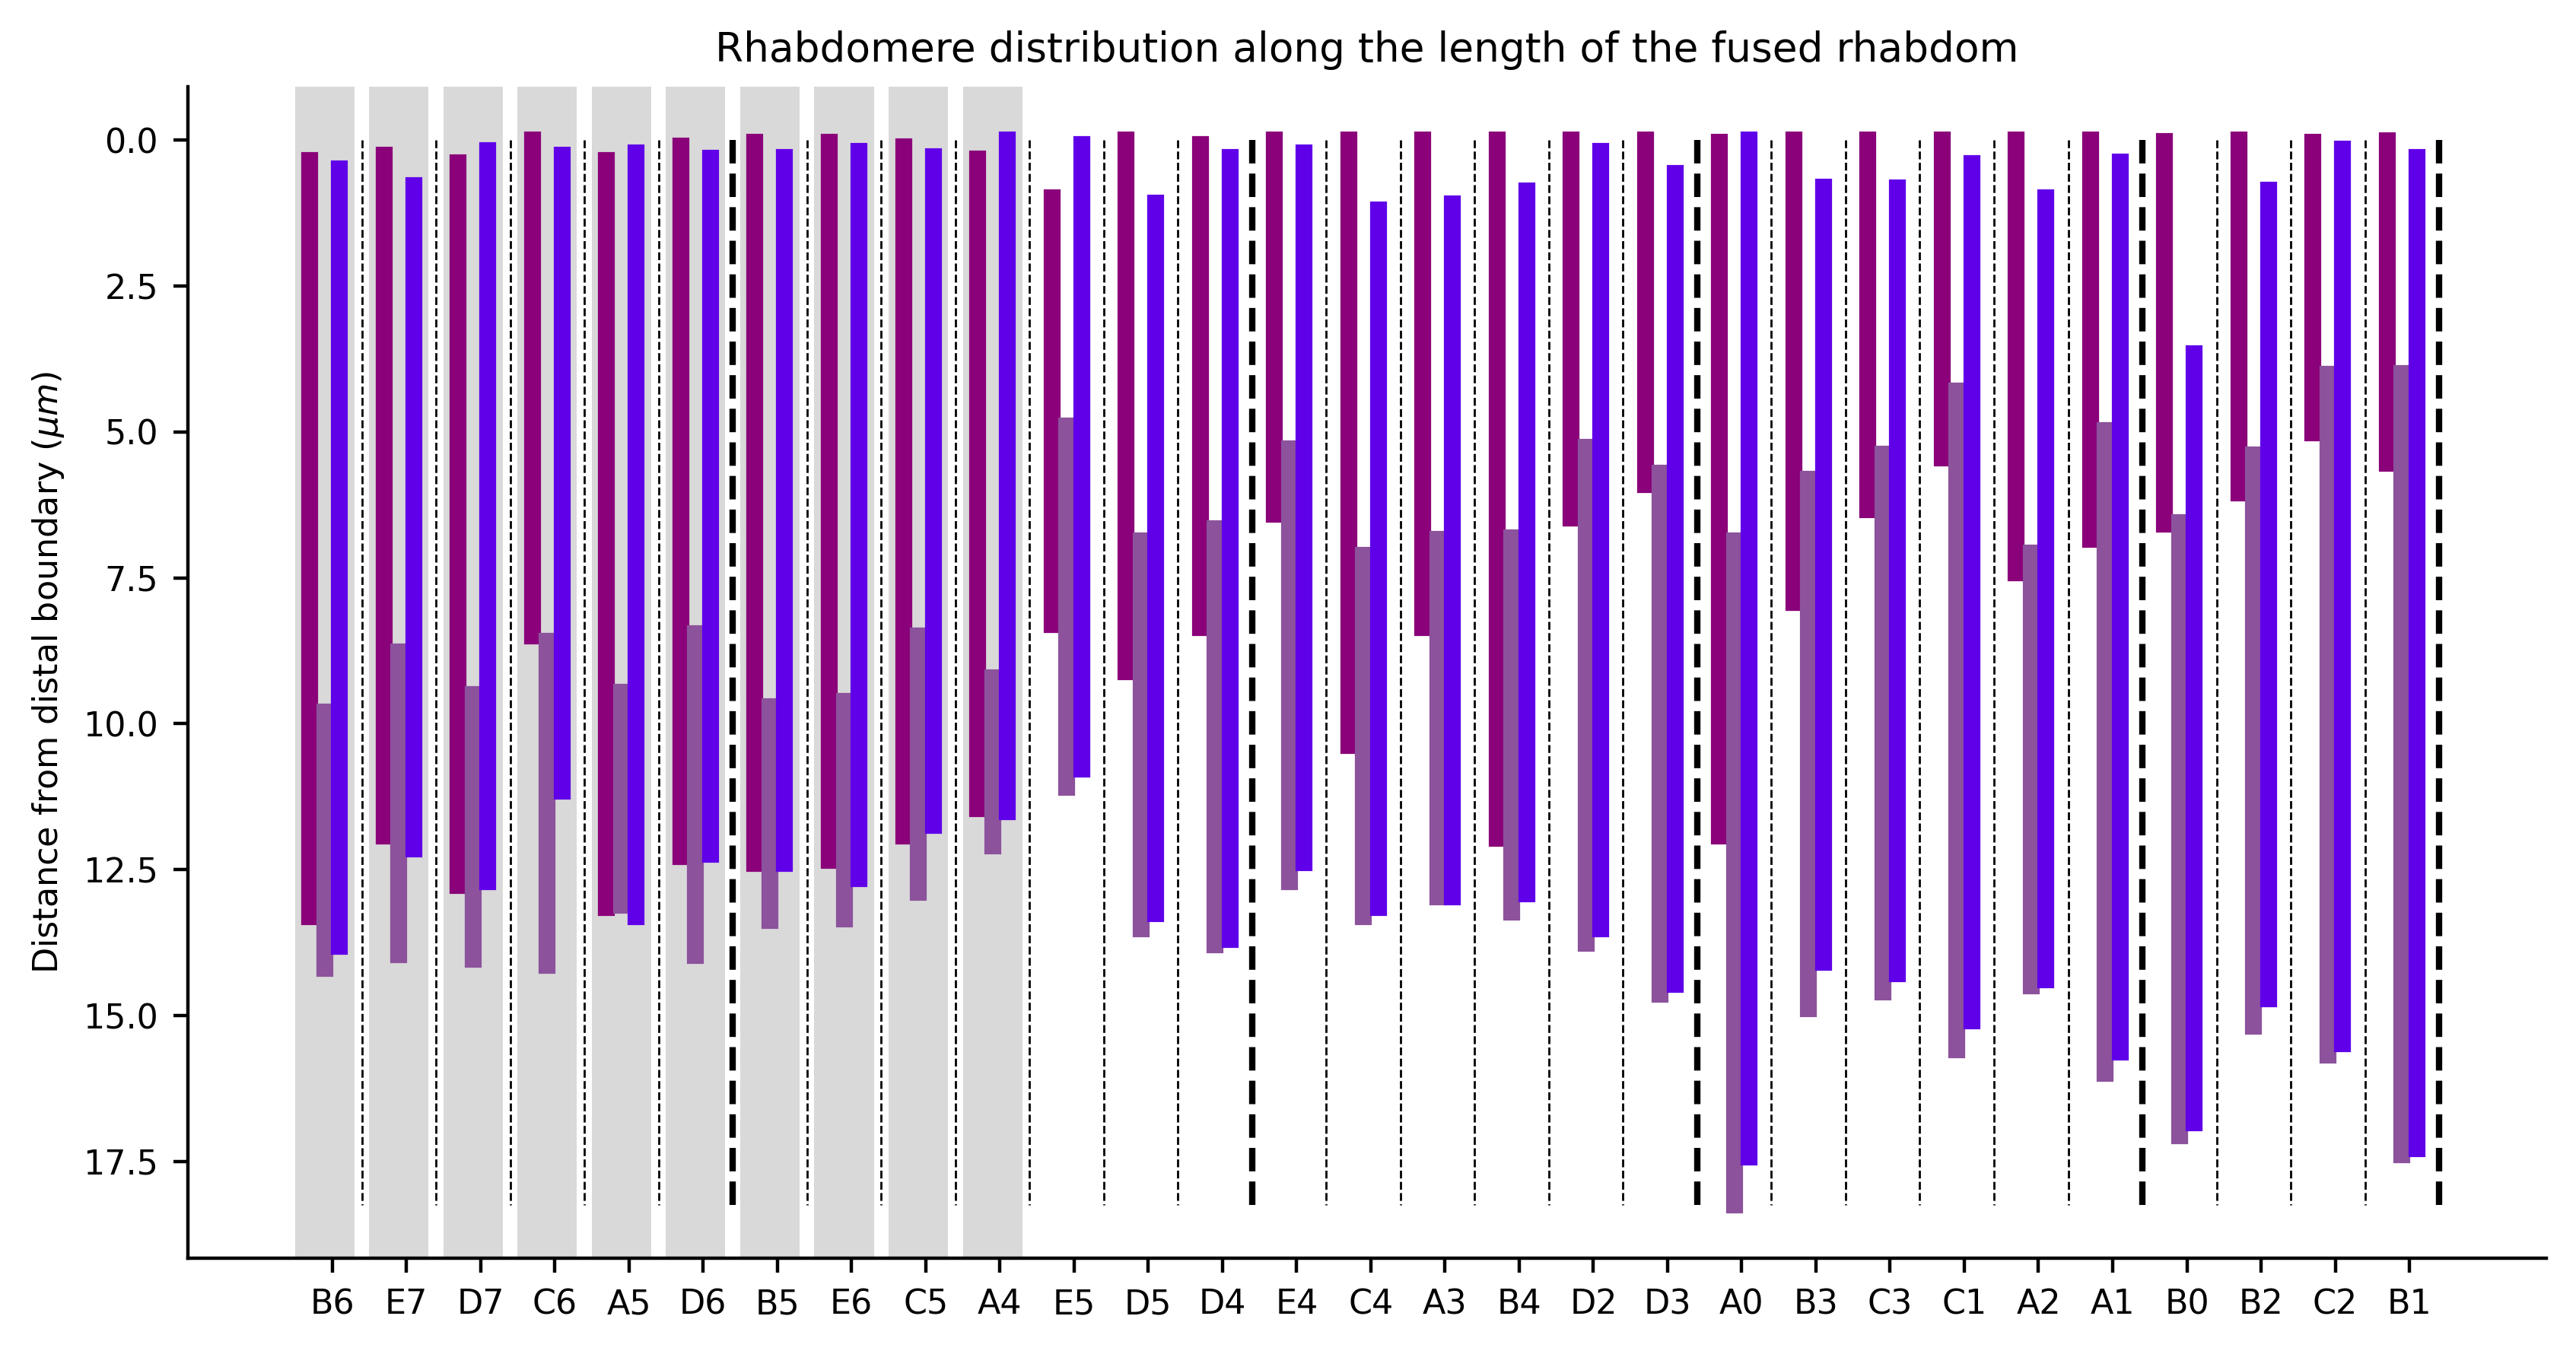

In [17]:
fig, ax = plt.subplots(figsize=[10, 5])
lvf_rows = [i for i, r in df.iterrows() if (int(r['subtype'][1]) > 6)]
lvf_df = df.loc[lvf_rows]

ylim = lvf_df['prox_microns'].max()
order = {'R7': 0, 'R8': 1, "R7'": 2}

pr_spacing = 5.0
om_spacing = 10.0
xtick_pos = []
xtick_labels = []

x = 0
i = 0

display(lvf_df)
# for om, rows in lvf_df.groupby('om'):
for om in ['B6', 'E7', 'D7', 'C6', 'A5', 'D6', 'B5', 'E6', 'C5', 'A4', 'E5', 'D5',
       'D4', 'E4', 'C4', 'A3', 'B4', 'D2', 'D3', 'A0', 'B3', 'C3', 'C1', 'A2',
       'A1', 'B0', 'B2', 'C2', 'B1']:
    rows = lvf_df.loc[lvf_df['om'] == om]
    print(rows)
    for ind, r in rows.iloc[rows['subtype'].map(order)].iterrows():

        y1 = r['dist_microns']
        y2 = r['prox_microns']
        
        if om in ['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E6', 'E7'] and ind % 3 == 0: 
            # add grey bar to DRA ommatidia
            #['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7']:
            ax.axvspan(x - om_spacing, x + (4*pr_spacing + om_spacing), facecolor='0.85')
        
        ax.plot([x, x], [y1, y2], c=cm[r['subtype']], linewidth=4.0)
        i += 1
        x += pr_spacing

        if (i % 3 == 0) and (i > 0):
            xtick_pos.append(x - 2*pr_spacing)
            xtick_labels.append(om)
            x += om_spacing
            if i in [6*3, 13*3, 19*3, 25*3, 29*3]:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=1.5)
            else:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=0.5)
            x += om_spacing
        x += pr_spacing

ax.set_title('Rhabdomere distribution along the length of the fused rhabdom')
ax.set_xticks(xtick_pos)
ax.set_xticklabels(xtick_labels)
ax.set_ylabel('Distance from distal boundary ($\mu m$)')
ax.invert_yaxis()

if save_figs:
    fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/210709/PR_lvf_rh_length.svg')
    fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/210709/PR_lvf_rh_length.png')


In [ ]:
fig, ax = plt.subplots(figsize=[20, 10])
lvf_rows = [i for i, r in df.iterrows() if r['subtype'] in ['R7', 'R8']]
lvf_df = df.loc[lvf_rows]

ylim = lvf_df['prox_microns'].max()
order = {'R7': 0, 'R8': 1}

spacing = 5.0

x = 0
i = 0
xtick_pos = []
xtick_labels = []

for om, rows in lvf_df.groupby('om'):
    
    for ind, r in rows.iloc[rows['subtype'].map(order)].iterrows():
        
        y1 = r['dist_microns']
        y2 = r['prox_microns']
        ax.plot([x, x], [y1, y2], c=cm[r['subtype']], linewidth=10.0)
        i += 1
        x += spacing

        if (i % 2 == 0) and (i > 0):
            xtick_pos.append(x - spacing)
            xtick_labels.append(om)
            x += spacing
            if om in ['A5', 'B6', 'C6', 'D7']:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=2.0)
            else:
                ax.plot([x, x], [0, ylim], c='k', linestyle='--', linewidth=0.5)
            x += spacing
        x += spacing
ax.set_xticks(xtick_pos)
ax.set_xticklabels(xtick_labels)
ax.set_ylabel('Distal position of photoreceptor rhabdomeres')
